In [ ]:
from infrastructure.classes import Experiment, TrainParameters
from infrastructure.training import train
from pushforward_operators import NeuralQuantileRegression
import torch

# experiment = Experiment(
#     tensor_parameters=dict(dtype=torch.float64, device=torch.device("cpu")),
#     dataset_name="picnn_fnlvqr_banana",
#     dataset_number_of_points=10**4,
#     dataset_parameters=dict(number_of_features=10, number_of_classes=2),
#     dataloader_parameters=dict(batch_size=1024, shuffle=True),
#     pushforward_operator_name="neural_quantile_regression",
#     pushforward_operator_parameters=dict(
#         feature_dimension=1,
#         response_dimension=2,
#         hidden_dimension=8,
#         number_of_hidden_layers=4,
#     ),
#     train_parameters=TrainParameters(
#         number_of_epochs_to_train=10,
#         verbose=True,
#         optimizer_parameters=dict(lr=0.01),
#         scheduler_parameters=dict(eta_min=0)
#     )
# )

model = NeuralQuantileRegression.load_class("../../experiments_full_16_09_2025_/picnn_fnlvqr_banana/neural_quantile_regression_u/weights.pth")
_ = model.eval()

In [70]:
from pushforward_operators import NeuralQuantileRegression

model = NeuralQuantileRegression.load_class("../../experiments_full_16_09_2025_/fnlvqr_glasses/neural_quantile_regression_y/weights.pth")
_ = model.eval()

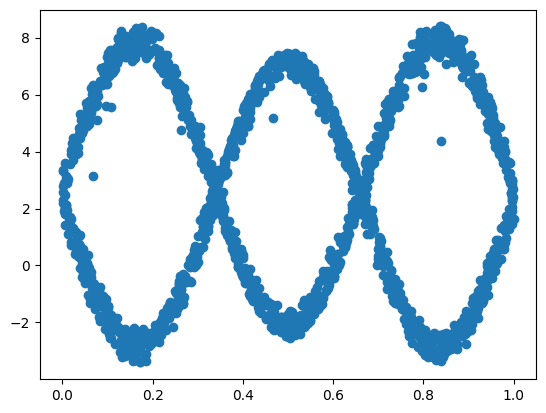

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt
from datasets import PICNN_FNLVQR_Banana, FNLVQR_Glasses
from utils.plot import plot_quantile_levels_from_dataset

tensor_parameters=dict(dtype=torch.float64, device=torch.device("cpu"))
model.to(**tensor_parameters)
U = torch.randn(2000, 1).to(**tensor_parameters)
X = torch.rand(2000, 1).to(**tensor_parameters)

Y = model.push_u_given_x(U, X)
plt.scatter(X.flatten(), Y.flatten())
plt.show()

In [55]:
from metrics import wassertein2
from datasets import FNLVQR_Glasses

dataset = FNLVQR_Glasses(**tensor_parameters)

for i in range(100):
    X_dataset, Y_dataset = dataset.sample_joint(n_points=2000)
    U_dataset = torch.randn(2000, 1).to(**tensor_parameters)
    Y_approx = model.push_u_given_x(U_dataset, X_dataset)

    print(wassertein2(Y_dataset, Y_approx))

/Users/vladimir.kondratyev/conditional_quantile_function/src/pushforward_operators/convex_potential_flow/cpflows.py:215: UserWarning: brute force
  warnings.warn("brute force")


tensor(0.0042, dtype=torch.float64)
tensor(0.0111, dtype=torch.float64)
tensor(2283.9870, dtype=torch.float64)
tensor(0.0513, dtype=torch.float64)
tensor(0.0054, dtype=torch.float64)
tensor(0.0284, dtype=torch.float64)
tensor(0.0052, dtype=torch.float64)
tensor(0.0355, dtype=torch.float64)
tensor(0.0990, dtype=torch.float64)
tensor(0.0318, dtype=torch.float64)
tensor(0.0136, dtype=torch.float64)
tensor(0.0082, dtype=torch.float64)
tensor(0.0312, dtype=torch.float64)
tensor(294.5192, dtype=torch.float64)
tensor(0.0041, dtype=torch.float64)
tensor(100.3776, dtype=torch.float64)
tensor(0.0295, dtype=torch.float64)
tensor(0.0392, dtype=torch.float64)
tensor(10.9922, dtype=torch.float64)
tensor(0.0155, dtype=torch.float64)
tensor(0.0098, dtype=torch.float64)
tensor(0.0084, dtype=torch.float64)
tensor(0.0153, dtype=torch.float64)
tensor(0.0541, dtype=torch.float64)
tensor(0.0131, dtype=torch.float64)
tensor(0.0419, dtype=torch.float64)
tensor(47.6318, dtype=torch.float64)
tensor(0.0034, dtyp

KeyboardInterrupt: 

In [56]:
import torch

torch.load("../../experiments_full_16_09_2025_/fnlvqr_glasses/convex_potential_flow/metrics.pth")['Y|X_wasserstein2']

[tensor(1.1478),
 tensor(1.3514),
 tensor(1.6888),
 tensor(2.2410),
 tensor(1.9664),
 tensor(1.7065),
 tensor(1.9524),
 tensor(1.7139),
 tensor(1.5295),
 tensor(298.6143),
 tensor(0.7022),
 tensor(2.4770),
 tensor(2.0712),
 tensor(1.7195),
 tensor(1.4107),
 tensor(1.6947),
 tensor(1.4833),
 tensor(1.3519),
 tensor(1.2216),
 tensor(1.4710),
 tensor(0.0069),
 tensor(1.6309),
 tensor(1.0929),
 tensor(0.8583),
 tensor(1.0423),
 tensor(1.0550),
 tensor(1.0169),
 tensor(0.9798),
 tensor(0.8976),
 tensor(0.8598),
 tensor(1.0249),
 tensor(0.5147),
 tensor(1.2763),
 tensor(49.5485),
 tensor(39.6533),
 tensor(33.0947),
 tensor(28.3839),
 tensor(24.9268),
 tensor(22.1750),
 tensor(20.2406),
 tensor(1.2260),
 tensor(0.9702),
 tensor(1.0733),
 tensor(0.8511),
 tensor(0.8814),
 tensor(0.9242),
 tensor(0.9851),
 tensor(0.9629),
 tensor(0.9309),
 tensor(0.9074),
 tensor(0.0268),
 tensor(0.0592),
 tensor(0.1397),
 tensor(0.6597),
 tensor(0.6074),
 tensor(0.6131),
 tensor(0.5270),
 tensor(0.5103),
 tens